In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
data=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#preparing x and y variables for traing the and building the model:
X=data.drop(columns=['math score'],axis=1)

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("categories in gender variables:")
print(data['gender'].unique())

categories in gender variables:
['female' 'male']


In [7]:
print("categories in race variables:")
print(data['race/ethnicity'].unique())

categories in race variables:
['group B' 'group C' 'group A' 'group D' 'group E']


In [8]:
print("categories in parental level education variables:")
print(pd.DataFrame(data['parental level of education'].unique()))

categories in parental level education variables:
                    0
0   bachelor's degree
1        some college
2     master's degree
3  associate's degree
4         high school
5    some high school


In [9]:
print("categori of the lunch")
print(data['lunch'].unique())

categori of the lunch
['standard' 'free/reduced']


In [10]:
print("category of the test prepartion course:")
print(data['test preparation course'].unique())

category of the test prepartion course:
['none' 'completed']


In [11]:
y=data['math score']
y.sample(3)

314    59
367    61
823    71
Name: math score, dtype: int64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [13]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [14]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
cat_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
        [
                ("OneHotEncoder",cat_transformer,cat_features),
                ("StandardScaler",numeric_transformer,num_features),
        ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 19)

In [18]:
print(pd.DataFrame(X[0],X[12]))

                 0
1.000000  1.000000
0.000000  0.000000
0.000000  0.000000
1.000000  1.000000
0.000000  0.000000
0.000000  0.000000
0.000000  0.000000
0.000000  0.000000
0.000000  1.000000
1.000000  0.000000
0.000000  0.000000
0.000000  0.000000
0.000000  0.000000
0.000000  0.000000
1.000000  1.000000
0.000000  0.000000
1.000000  1.000000
0.810737  0.193999
0.325651  0.391492


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=900)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [20]:
def evaluate_model(true,predicted):
        mae = mean_absolute_error(true, predicted)
        mse=mean_squared_error(true,predicted)
        rmse=np.sqrt(mean_squared_error(true,predicted))
        r2_sqare=r2_score(true,predicted)
        return mae,rmse,r2_sqare

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [22]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3956
- Mean Absolute Error: 4.3090
- R2 Score: 0.8762
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0945
- Mean Absolute Error: 4.0599
- R2 Score: 0.8747


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5913
- Mean Absolute Error: 5.1671
- R2 Score: 0.8152
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4421
- Mean Absolute Error: 5.1977
- R2 Score: 0.7996


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3935
- Mean Absolute Error: 4.3032
- R2 Score: 0.8763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0787
- Mean Absolute Error: 4.0473
- R2 Score: 0.8754


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9243
- Mean Absolute Error: 4.7250
- R2 Score: 0.8507
-----------------------

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.875431
0,Linear Regression,0.874655
7,CatBoosting Regressor,0.851415
5,Random Forest Regressor,0.841461
8,AdaBoost Regressor,0.819599
6,XGBRegressor,0.810709
1,Lasso,0.799570
3,K-Neighbors Regressor,0.797113
4,Decision Tree,0.732348


In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.47


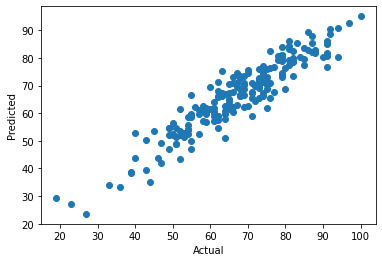

In [25]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


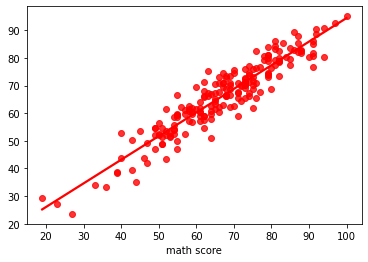

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [27]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
851,61,57.203125,3.796875
752,79,72.968750,6.031250
478,55,59.265625,-4.265625
390,73,65.437500,7.562500
200,67,74.468750,-7.468750
...,...,...,...
433,47,42.156250,4.843750
387,57,59.625000,-2.625000
521,91,76.906250,14.093750
909,70,74.437500,-4.437500
